In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, filters
from skimage.segmentation import slic, mark_boundaries
from skimage.feature import canny
from skimage.color import rgb2gray
import torch
from torchvision import models, transforms
from PIL import Image


In [2]:

def detect_edges_segment(img_path):
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        raise ValueError(f"Error: Unable to load image at {img_path}")
    edge_map = cv2.Canny(img_gray, 100, 200)
    plt.imshow(edge_map, cmap='gray')
    plt.title('Edge Detection - Canny')
    plt.show()

In [3]:

def slic_based_segmentation(img_path):
    img_color = cv2.imread(img_path)
    seg_map = slic(img_color, n_segments=100, compactness=10)
    plt.imshow(mark_boundaries(img_color, seg_map))
    plt.title('SLIC-Based Segmentation')
    plt.show()


In [4]:
def hough_line_circle_detection(img_path):
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    edge_detect = cv2.Canny(img_gray, 50, 150)

    # Detect lines
    line_segments = cv2.HoughLines(edge_detect, 1, np.pi / 180, 150)
    img_result = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
    if line_segments is not None:
        for rho, theta in line_segments[:, 0]:
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a * rho, b * rho
            x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
            x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
            cv2.line(img_result, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Detect circles
    circle_segments = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
    if circle_segments is not None:
        circle_segments = np.uint16(np.around(circle_segments))
        for i in circle_segments[0, :]:
            cv2.circle(img_result, (i[0], i[1]), i[2], (255, 0, 0), 2)

    plt.imshow(img_result)
    plt.title('Hough Transform - Lines and Circles')
    plt.show()


In [5]:
def object_detection_yolo(img_source):
    yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
    img_input = Image.open(img_source)
    detect_results = yolo_model(img_input)
    detect_results.show()

def object_detection_rcnn(img_source):
    rcnn_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    rcnn_model.eval()
    transform_pipeline = transforms.Compose([transforms.ToTensor()])
    img_rcnn = Image.open(img_source).convert("RGB")
    img_tensor = transform_pipeline(img_rcnn).unsqueeze(0)
    rcnn_output = rcnn_model(img_tensor)
    print(rcnn_output)

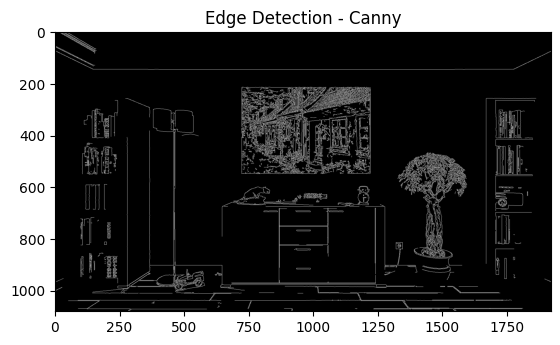

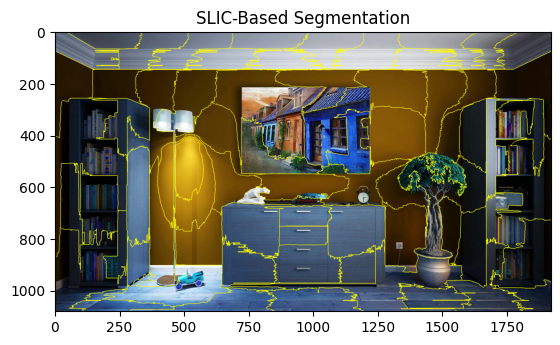

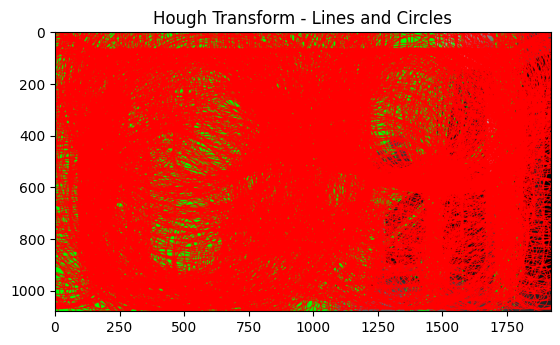

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-3-9 Python-3.11.11 torch-2.5.1+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 130MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


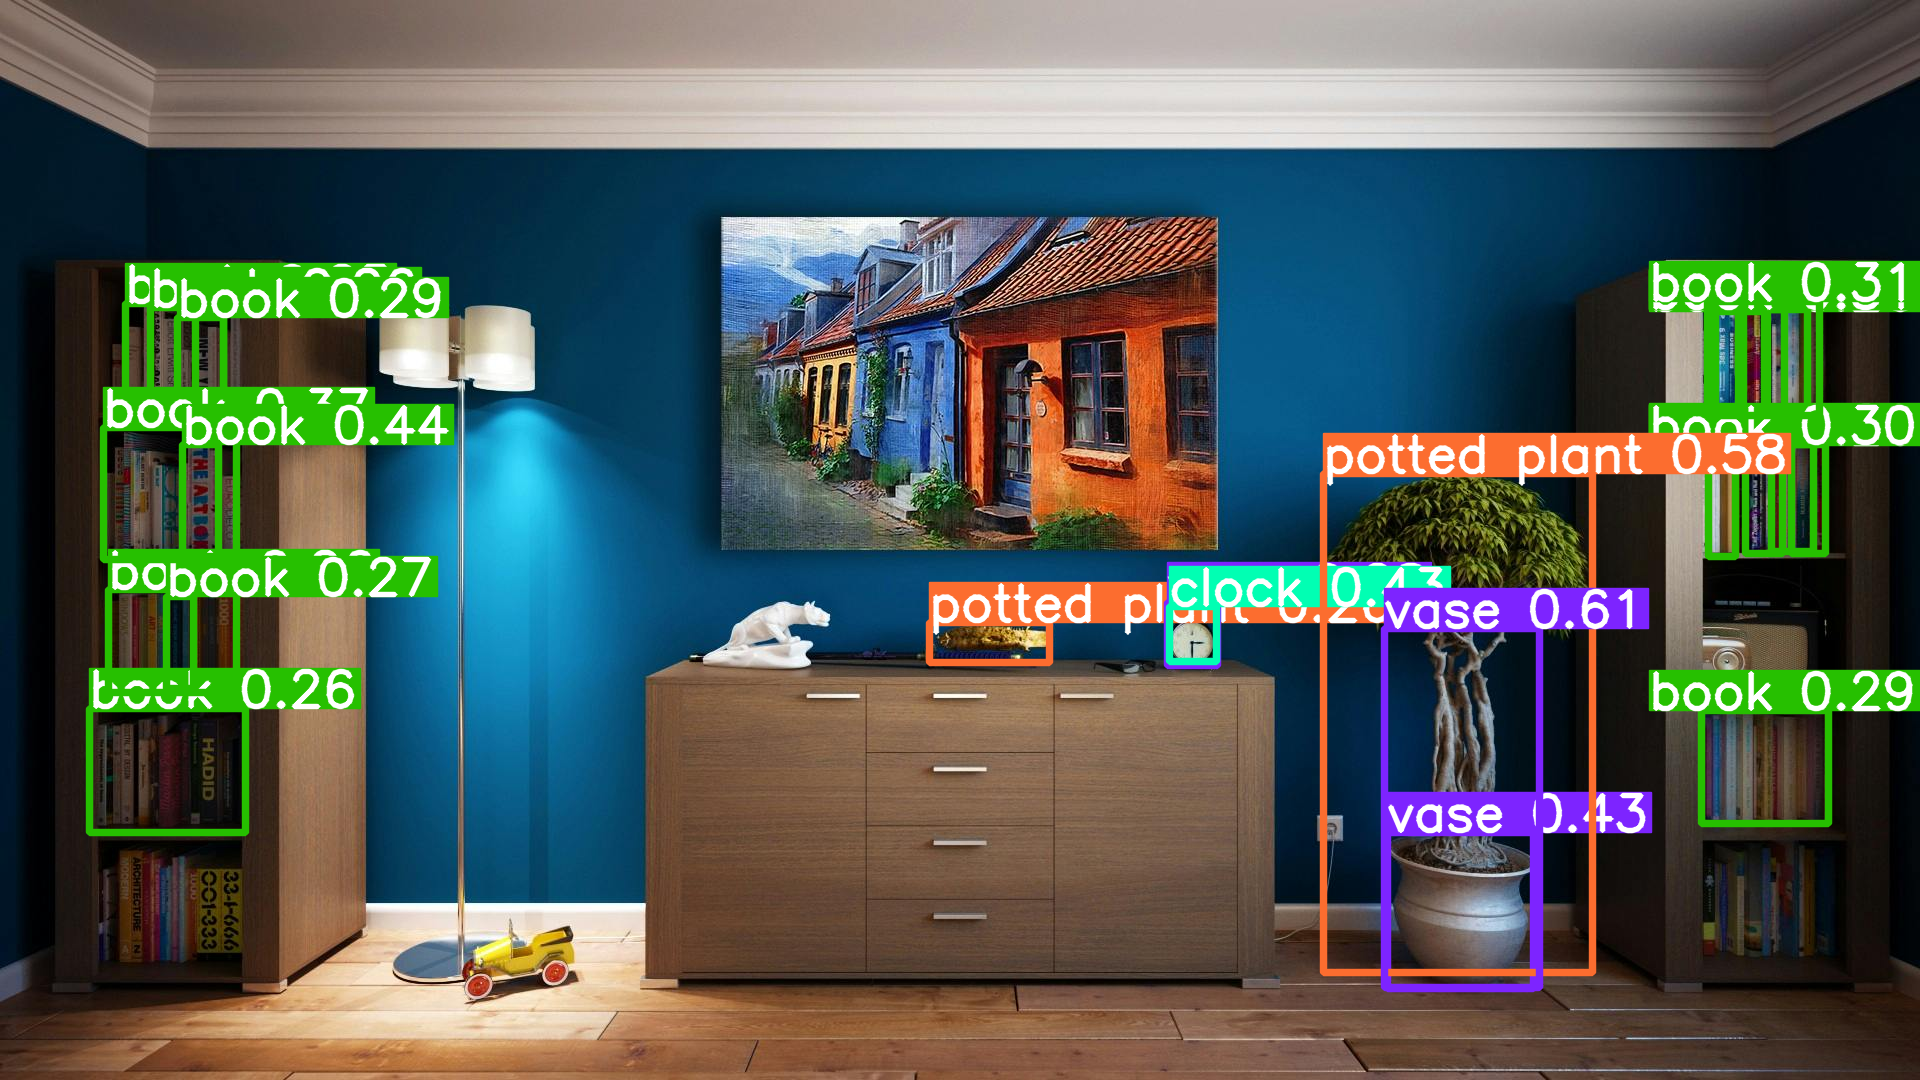

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 116MB/s]


[{'boxes': tensor([[1323.07458,  472.93744, 1590.34753,  984.85437],
        [1169.60303,  622.68707, 1214.01001,  666.35193],
        [1713.73169,  305.85617, 1734.60986,  411.27863],
        [1732.68323,  310.92798, 1745.94958,  410.71774],
        [1745.42175,  306.94748, 1760.25293,  410.14642],
        [ 188.25209,  443.64944,  213.96227,  551.76343],
        [ 188.50871,  324.15512,  210.70691,  413.01913],
        [ 165.18510,  315.12344,  188.31270,  412.67337],
        [1700.80908,  703.11627, 1837.05078,  825.57635],
        [ 196.97516,  863.32281,  230.39024,  958.56061],
        [ 123.28191,  322.54437,  142.03575,  413.60965],
        [1725.23450,  310.58994, 1741.51526,  410.77551],
        [ 153.23125,  712.71130,  191.43781,  828.99573],
        [  89.94852,  703.15070,  245.05225,  834.06860],
        [1695.35181,  426.05679, 1843.35828,  556.50122],
        [ 102.03710,  431.04028,  241.24980,  557.78528],
        [ 225.52809,  316.20346,  242.95082,  411.77670],
   

In [6]:

# Example usage
img_path = '/content/room.jpg'
detect_edges_segment(img_path)
slic_based_segmentation(img_path)
hough_line_circle_detection(img_path)
object_detection_yolo(img_path)
object_detection_rcnn(img_path)